# Budget Sales Analytics : Project 12
### By Anwesha Baidya : UMIP13240

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from itertools import combinations
import plotly.figure_factory as ff
import plotly.express as px
import datetime as dt
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import urllib.request

## Preprocessing

In [3]:
customers_data=pd.read_excel("Budget Sales data\AdventureWorks_Database.xlsx","Customers",dtype={'CustomerKey':str},parse_dates=['BirthDate','DateFirstPurchase'])
product_data = pd.read_excel('Budget Sales data\AdventureWorks_Database.xlsx',
                              'Product',
                              dtype={'ProductKey':str},
                              parse_dates=['StartDate']
                              )
Sales_data = pd.read_excel('Budget Sales data\AdventureWorks_Database.xlsx',
                              'Sales',
                              dtype={'ProductKey':str,
                                     'CustomerKey':str,
                                     'PromotionKey':str,
                                     'SalesTerritoryKey':str},
                              parse_dates=['OrderDate', 'ShipDate']
                              )
Sales_data['DateKey'] = Sales_data['OrderDate'].astype(str)
Territory_data = pd.read_excel('Budget Sales data\AdventureWorks_Database.xlsx',
                              'Territory',
                              dtype={'SalesTerritoryKey':str}
                              )

In [4]:
customers_data.head()

,CustomerKey,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance
0,11000,Jon,Yang,"Yang, Jon",1966-04-08,M,M,90000,2,0,Bachelors,Professional,1,0,3761 N. 14th St,2014-01-22,1-2 Miles
1,11001,Eugene,Huang,"Huang, Eugene",1965-05-14,S,M,60000,3,3,Bachelors,Professional,0,1,2243 W St.,2014-01-18,0-1 Miles
2,11002,Ruben,Torres,"Torres, Ruben",1965-08-12,M,M,60000,3,3,Bachelors,Professional,1,1,5844 Linden Land,2014-01-10,2-5 Miles
3,11003,Christy,Zhu,"Zhu, Christy",1968-02-15,S,F,70000,0,0,Bachelors,Professional,0,1,1825 Village Pl.,2014-01-01,5-10 Miles
4,11004,Elizabeth,Johnson,"Johnson, Elizabeth",1968-08-08,S,F,80000,5,5,Bachelors,Professional,1,4,7553 Harness Circle,2014-01-26,1-2 Miles


In [6]:
product_data.head()

,ProductKey,ProductName,SubCategory,Category,StandardCost,Color,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate
0,1,Adjustable Race,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
1,2,Bearing Ball,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
2,3,BB Ball Bearing,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
3,4,Headset Ball Bearings,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
4,5,Blade,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01


In [7]:
Sales_data.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,StandardCost,List Price,Unnamed: 22,diif std cost,diff list price,DateKey
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,...,0.0,NaN,-764.3184,NaN,2171.2942,3578.2700,NaN,0,0,2014-01-01
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.9950,...,0.0,NaN,-424.3188,NaN,1912.1544,3399.9900,NaN,0,0,2014-01-01
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.9950,...,0.0,NaN,-424.3188,NaN,1912.1544,3399.9900,NaN,0,0,2014-01-01
3,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.5491,...,0.0,NaN,-127.1944,NaN,413.1463,699.0982,NaN,0,0,2014-01-01
4,346,2014-01-01,2014-01-08,11003,1,9,SO43701,1,2,1699.9950,...,0.0,NaN,-424.3188,NaN,1912.1544,3399.9900,NaN,0,0,2014-01-01


In [8]:
Territory_data.head()

,SalesTerritoryKey,Region,Country,Group,RegionImage
0,1,Northwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,2,Northeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,3,Central,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,4,Southwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,5,Southeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...


In [5]:
customers_data.columns

Index(['CustomerKey', 'FirstName', 'LastName', 'FullName', 'BirthDate',
       'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'AddressLine1', 'DateFirstPurchase',
       'CommuteDistance'],
      dtype='object')

In [6]:
product_data.columns

Index(['ProductKey', 'ProductName', 'SubCategory', 'Category', 'StandardCost',
       'Color', 'ListPrice', 'DaysToManufacture', 'ProductLine', 'ModelName',
       'Photo', 'ProductDescription', 'StartDate'],
      dtype='object')

In [7]:
product_data.columns

Index(['ProductKey', 'ProductName', 'SubCategory', 'Category', 'StandardCost',
       'Color', 'ListPrice', 'DaysToManufacture', 'ProductLine', 'ModelName',
       'Photo', 'ProductDescription', 'StartDate'],
      dtype='object')

In [8]:
Sales_data.columns

Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'StandardCost',
       'List Price', 'Unnamed: 22', 'diif std cost', 'diff list price',
       'DateKey'],
      dtype='object')

In [9]:
Territory_data.columns

Index(['SalesTerritoryKey', 'Region', 'Country', 'Group', 'RegionImage'], dtype='object')

## MERGING

In [9]:
temp_data = pd.merge(Sales_data, product_data, on='ProductKey', how='inner')
df = pd.merge(temp_data, customers_data, on='CustomerKey', how='inner')
df = pd.merge(df, Territory_data, on='SalesTerritoryKey', how='inner')

In [10]:
df.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance,Region,Country,Group,RegionImage
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,...,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.9950,...,Manual,0,0,"14, avenue du Port",2014-01-01,0-1 Miles,France,France,Europe,http://www.avising.com/me/LearnPBI/DataSources...
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.9950,...,Professional,1,3,4193 E. 28th Street,2014-01-01,10+ Miles,Northwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.5491,...,Management,1,2,249 Alexander Pl.,2014-01-01,1-2 Miles,Southwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,346,2014-01-01,2014-01-08,11003,1,9,SO43701,1,2,1699.9950,...,Professional,0,1,1825 Village Pl.,2014-01-01,5-10 Miles,Australia,Australia,Pacific,http://www.avising.com/me/LearnPBI/DataSources...


In [11]:
# Describing
df.shape

(58189, 58)

In [12]:
# REMOVING UNNECESSARY COLUMNS 
col=["Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 22","StandardCost_x","List Price","diif std cost","diff list price"]
df.drop(columns=col,axis=1,inplace=True)

In [13]:
# CHECKING AGAIN
df.shape

(58189, 46)

In [14]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
OrderDate,58189,2016-06-03 03:56:09.605939200,2014-01-01 00:00:00,2016-04-01 00:00:00,2016-07-07 00:00:00,2016-10-10 00:00:00,2016-12-30 00:00:00,NaN
ShipDate,58189,2016-06-10 04:03:24.657237760,2014-01-08 00:00:00,2016-04-08 00:00:00,2016-07-14 00:00:00,2016-10-17 00:00:00,2017-01-07 00:00:00,NaN
SalesOrderLineNumber,58189.0,1.887453,1.0,1.0,2.0,2.0,8.0,1.018829
OrderQuantity,58189.0,1.569386,1.0,1.0,1.0,2.0,4.0,1.047532
UnitPrice,58189.0,413.888218,0.5725,4.99,24.49,269.995,3578.27,833.052938
TotalProductCost,58189.0,296.539185,0.8565,3.3623,12.1924,343.6496,2171.2942,560.171436
SalesAmount,58189.0,503.66627,2.29,8.99,32.6,539.99,3578.27,941.462817
TaxAmt,58189.0,40.293303,0.1832,0.7192,2.608,43.1992,286.2616,75.317027
StandardCost_y,58189.0,296.539185,0.8565,3.3623,12.1924,343.6496,2171.2942,560.171436
ListPrice,58189.0,503.66627,2.29,8.99,32.6,539.99,3578.27,941.462817


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  object        
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  object        
 4   PromotionKey          58189 non-null  object        
 5   SalesTerritoryKey     58189 non-null  object        
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  DateKey         

In [16]:
df = df.rename(columns={'StandardCost_y': 'StandardCost'}) # renaming 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  object        
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  object        
 4   PromotionKey          58189 non-null  object        
 5   SalesTerritoryKey     58189 non-null  object        
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  DateKey         

In [18]:
# HANDLING MISSING DATA
missing_count_percent = df.isnull().sum() * 100 / df.shape[0]
missing_count_percent

ProductKey               0.000000
OrderDate                0.000000
ShipDate                 0.000000
CustomerKey              0.000000
PromotionKey             0.000000
SalesTerritoryKey        0.000000
SalesOrderNumber         0.000000
SalesOrderLineNumber     0.000000
OrderQuantity            0.000000
UnitPrice                0.000000
TotalProductCost         0.000000
SalesAmount              0.000000
TaxAmt                   0.000000
DateKey                  0.000000
ProductName              0.000000
SubCategory              0.000000
Category                 0.000000
StandardCost             0.000000
Color                   47.160116
ListPrice                0.000000
DaysToManufacture        0.000000
ProductLine              0.000000
ModelName                0.000000
Photo                    0.000000
ProductDescription       0.000000
StartDate                0.000000
FirstName                0.000000
LastName                 0.000000
FullName                 0.000000
BirthDate     

In [19]:
df_missing_count_percent = pd.DataFrame(missing_count_percent).round(2)
df_missing_count_percent

,0
ProductKey,0.00
OrderDate,0.00
ShipDate,0.00
CustomerKey,0.00
PromotionKey,0.00
SalesTerritoryKey,0.00
SalesOrderNumber,0.00
SalesOrderLineNumber,0.00
OrderQuantity,0.00
UnitPrice,0.00


In [20]:

#  Drop columns with nan values
df= df.dropna(axis=1)

In [21]:
#some additional columns
# Extracting Year from OrderDate
df['sale_year'] = df['OrderDate'].dt.year

# Extracting Month from OrderDate
df['sale_month'] = df['OrderDate'].dt.month

# Extracting day from OrderDate
df['sale_day'] = df['OrderDate'].dt.day

# Extracting dayofweek from OrderDate
df['sale_week'] = df['OrderDate'].dt.dayofweek

# Extracting day_name from OrderDate
df['sale_day_name'] = df['OrderDate'].dt.day_name()

# Extracting Month Year from OrderDate
df['year_month'] = df['OrderDate'].apply(lambda x:x.strftime('%Y-%m'))

# Calculate Total Invoice Amount
df['total_Invoice_amount'] = df['SalesAmount'] + df['TaxAmt']

# Considering only salesamount and total_sales_amount to calculate profit 
df['profit'] = (df['UnitPrice']*df['OrderQuantity']) - df['TotalProductCost']

# Removing extra character from the string
df['ProductName'] = df['ProductName'].str.replace(',','-')

# Calculate Age
df['Age'] = df['OrderDate'].dt.year - df['BirthDate'].dt.year

## EDA

In [23]:
#list the product's categories
df['Category'].unique().tolist()

['Bikes', 'Accessories', 'Clothing']

In [25]:
#List of product's sub category
df['SubCategory'].unique().tolist()

['Road Bikes',
 'Mountain Bikes',
 'Bottles and Cages',
 'Touring Bikes',
 'Helmets',
 'Tires and Tubes',
 'Bike Stands',
 'Jerseys',
 'Gloves',
 'Fenders',
 'Caps',
 'Socks',
 'Hydration Packs',
 'Vests',
 'Cleaners',
 'Bike Racks',
 'Shorts']

In [26]:
df

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,RegionImage,sale_year,sale_month,sale_day,sale_week,sale_day_name,year_month,total_Invoice_amount,profit,Age
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,...,http://www.avising.com/me/LearnPBI/DataSources...,2014,1,1,2,Wednesday,2014-01,3864.5316,1406.9758,68
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.9950,...,http://www.avising.com/me/LearnPBI/DataSources...,2014,1,1,2,Wednesday,2014-01,3671.9892,1487.8356,50
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.9950,...,http://www.avising.com/me/LearnPBI/DataSources...,2014,1,1,2,Wednesday,2014-01,3671.9892,1487.8356,68
3,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.5491,...,http://www.avising.com/me/LearnPBI/DataSources...,2014,1,1,2,Wednesday,2014-01,755.0261,285.9519,76
4,346,2014-01-01,2014-01-08,11003,1,9,SO43701,1,2,1699.9950,...,http://www.avising.com/me/LearnPBI/DataSources...,2014,1,1,2,Wednesday,2014-01,3671.9892,1487.8356,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58184,561,2016-12-30,2017-01-07,13650,1,9,SO74145,1,1,2384.0700,...,http://www.avising.com/me/LearnPBI/DataSources...,2016,12,30,4,Friday,2016-12,2574.7956,902.1321,45
58185,584,2016-12-30,2017-01-07,26916,1,9,SO74146,1,1,539.9900,...,http://www.avising.com/me/LearnPBI/DataSources...,2016,12,30,4,Friday,2016-12,583.1892,196.3404,36
58186,605,2016-12-30,2017-01-07,27473,1,9,SO74147,1,1,539.9900,...,http://www.avising.com/me/LearnPBI/DataSources...,2016,12,30,4,Friday,2016-12,583.1892,196.3404,68
58187,538,2016-12-30,2017-01-07,27473,1,9,SO74147,2,1,21.4900,...,http://www.avising.com/me/LearnPBI/DataSources...,2016,12,30,4,Friday,2016-12,23.2092,13.4527,68


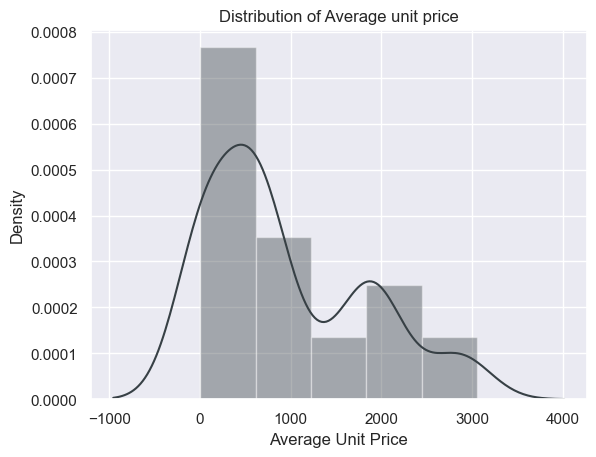

In [27]:
#ANALYSING UNIT PRICE
Avg_unit_price = df.groupby(['ProductKey'])['UnitPrice'].mean()
aup = sns.distplot(Avg_unit_price, kde=True, hist=True, color='#374045')
aup.set(title='Distribution of Average unit price',
       xlabel='Average Unit Price');

FROM THE ABOVE GRAPH WE KNOW THAT , FOR THE MAXIMUM PRODUCT , UNIT PRICE IS BELOW 100$

In [28]:
# SALES ORDER NUMBER DISTIBUTION
n_orders = df.groupby(['CustomerKey'])['SalesOrderNumber'].nunique()
multi_orders_perc = np.sum(n_orders > 1)/df['CustomerKey'].nunique()
print(f"{100*multi_orders_perc:.2f}% of customers ordered more than once.")

36.97% of customers ordered more than once.


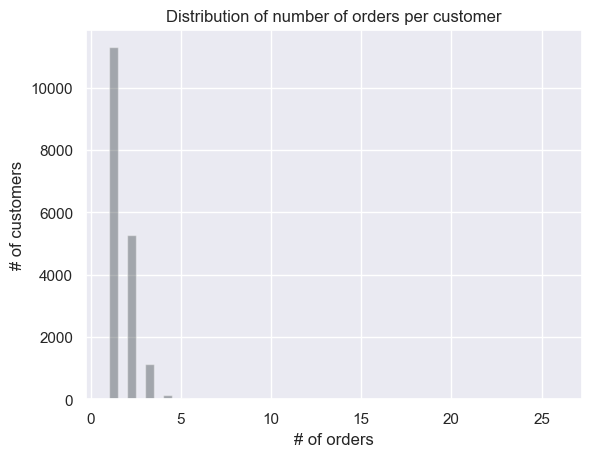

In [29]:
#Number of orders per customer 
ax = sns.distplot(n_orders, kde=False, color='#374045')
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders',
       ylabel='# of customers');

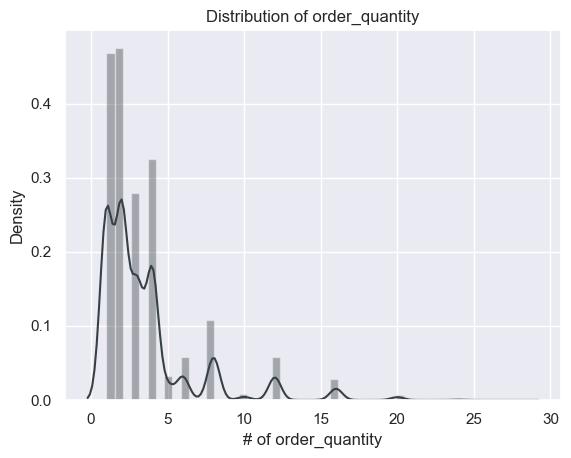

In [30]:
# SALES ORDER QUANTITY DISTRIBUTION
n_order_quantity = df.groupby(['SalesOrderNumber'])['OrderQuantity'].sum()
ax = sns.distplot(n_order_quantity, kde=True, hist=True,color='#374045')
ax.set(title='Distribution of order_quantity',
       xlabel='# of order_quantity',
       );

In [31]:
# AGE DISTIBUTION
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['agerange'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)

age_distribution = df['agerange'].value_counts().to_frame().reset_index()

age_distribution.columns = ['Age Range','Population count']

fig = px.bar(age_distribution, x='Age Range', y='Population count', color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=True,
    width=500,
    height=500,
    font=dict(size=10))
fig.show()

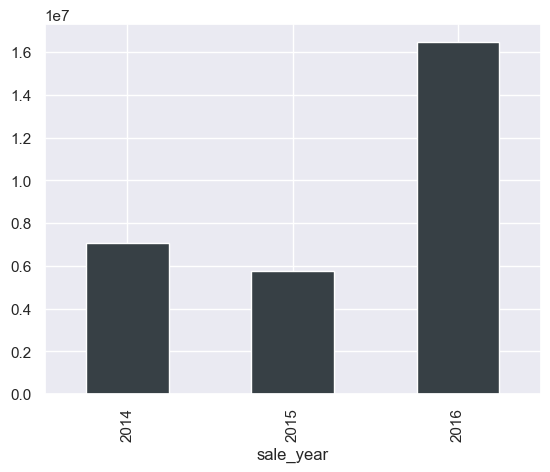

In [32]:
# YEAR WISE SALES DISTRIBUTION
df.groupby('sale_year')['SalesAmount'].sum().plot(kind='bar', color='#374045');

In [33]:
#TOP 5 SELLING PRODUCT
top_selling_product = df.groupby(['Category', 'SubCategory', 'ProductName'])['OrderQuantity'].sum().nlargest(5).to_frame()
top_selling_product

OrderQuantity
Category    SubCategory       ProductName                         
Accessories Bottles and Cages Water Bottle - 30 oz.           6370
            Tires and Tubes   Patch Kit/8 Patches             4705
                              Mountain Tire Tube              4551
                              Road Tire Tube                  3544
            Helmets           Sport-100 Helmet- Red           3398

In [34]:
top_selling_product.reset_index(inplace=True)
fig = px.bar(top_selling_product, x='ProductName', y='OrderQuantity',color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=True,
    width=500,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ),
    font=dict(size=8))
fig.show()

In [35]:
#Quantity ordered based on category and subcategory from 2014 to 2016
cat_subcat_qty = df.groupby(['sale_year','Category', 'SubCategory'])['OrderQuantity'].sum().to_frame()
cat_subcat_qty = cat_subcat_qty.sort_values(['sale_year', 'Category'], ascending=True)
cat_subcat_qty.style.bar(subset=['OrderQuantity'], color='#D9B300')

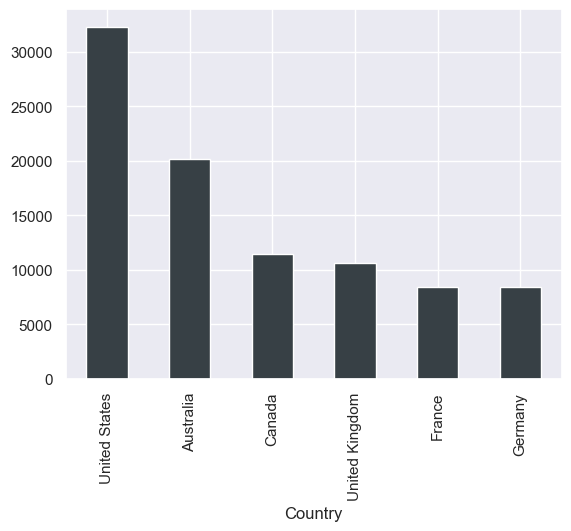

In [36]:
#COUNTRY WISE ORDERED
country_qty_sales = df.groupby('Country')['OrderQuantity'].sum().sort_values(ascending=False)
country_qty_sales.plot(kind='bar', color='#374045');

In [37]:
#Overall profit based on order year, category and subcategory
cat_subcat_profit = df.groupby(['sale_year','Category', 'SubCategory'])['profit'].sum().to_frame()

#Sorting the results
cat_subcat_profit = cat_subcat_profit.sort_values(['sale_year', 'Category'], ascending=True)
cat_subcat_profit.style.bar(subset=['profit'], color='#D9B300')

In [38]:
# LOW PROFIT CONTRIBUTED PRODUCT
df.groupby(['Category', 'SubCategory','ProductName'])['profit'].sum().nsmallest(10).to_frame()

profit
Category    SubCategory     ProductName                              
Clothing    Socks           Racing Socks- L                 1474.4574
                            Racing Socks- M                 1581.3837
Accessories Cleaners        Bike Wash - Dissolver           4299.8688
            Tires and Tubes Patch Kit/8 Patches             4314.8350
Clothing    Caps            AWC Logo Cap                    4331.8315
Accessories Tires and Tubes Touring Tire Tube               4363.8089
Clothing    Jerseys         Long-Sleeve Logo Jersey- XL     4495.6007
                            Short-Sleeve Classic Jersey- L  4544.8782
                            Long-Sleeve Logo Jersey- S      4610.5777
                            Short-Sleeve Classic Jersey- M  4793.2322

In [40]:
#How efficient are the logistics?
# Adding manufacturing days to the order received date
df['OrderreadyDate'] = df['OrderDate'] + pd.to_timedelta(df['DaysToManufacture'], unit='D')

# Check the delay between order shipment date and order ready to supply
df['shipping_efficiency'] = (df['ShipDate'] - df['OrderreadyDate']).dt.days

fig = px.histogram(df, x="shipping_efficiency", color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=True,
    width=300,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ),
    font=dict(size=10))
fig.show()

In [41]:
df.groupby('sale_month')['profit'].sum().to_frame().sort_values(by='profit', ascending= False).head(3)

,profit
sale_month,
12,1.314384e+06
11,1.290573e+06
6,1.256211e+06


In [42]:
#WHAT TIME SHOULD WE DISPLAY THE ADVERTISEMENT TO MAXIMISE THELIKELIHOOD OF CUSTOMERS BY BUYING PRODUCTS?
sales_by_week = df.groupby(['sale_day_name']).count()['SalesAmount'].reset_index().sort_values('SalesAmount', ascending=False)

fig = px.line(sales_by_week, x='sale_day_name', y='SalesAmount', title='Sales Frequency by week')
fig.update_layout(
    autosize=True,
    width=300,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ),
    font=dict(size=7))
fig.show()

In [43]:

# By setting keep on False, all duplicates are True since we only want repeated order number
dup_order = df[df['SalesOrderNumber'].duplicated(keep=False)]

In [44]:
# Group the data based on sales order number and product name because the products
# that bought together will have share same order number
dup_order['grouped'] = df.groupby('SalesOrderNumber')['ProductName'].transform(lambda x: ','.join(x))
dup_order = dup_order[['SalesOrderNumber', 'grouped']].drop_duplicates()

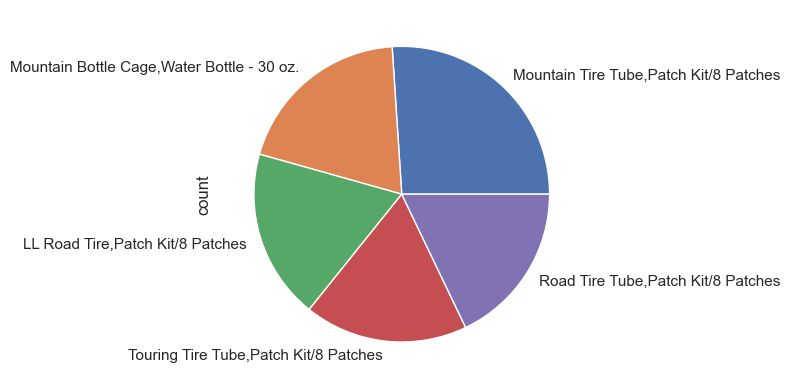

In [45]:
count = dup_order['grouped'].value_counts()[0:5].plot.pie()

In [46]:
count = Counter()

for row in dup_order['grouped']:
    row_list  = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('Mountain Bottle Cage', 'Water Bottle - 30 oz.') 1210
('Road Bottle Cage', 'Water Bottle - 30 oz.') 927
('Mountain Tire Tube', 'Patch Kit/8 Patches') 737
('Water Bottle - 30 oz.', 'Road Bottle Cage') 586
('Touring Tire', 'Touring Tire Tube') 567
('Road Tire Tube', 'Patch Kit/8 Patches') 556
('HL Mountain Tire', 'Mountain Tire Tube') 537
('Water Bottle - 30 oz.', 'AWC Logo Cap') 503
('ML Mountain Tire', 'Mountain Tire Tube') 431
('Mountain Tire Tube', 'Sport-100 Helmet- Black') 421


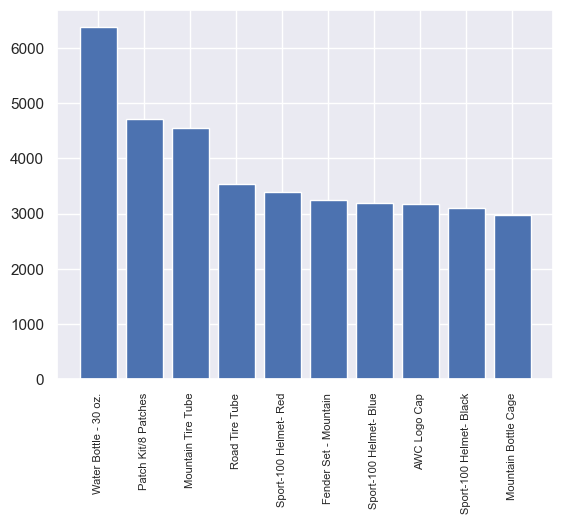

In [47]:
#WHICH PRODUCT SOLD THE MOST?
product_group = df.groupby('ProductName')
quantity_ordered = product_group['OrderQuantity'].sum().sort_values(ascending=False)[:10]
products = quantity_ordered.index.tolist()

plt.bar(products, quantity_ordered, )
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [51]:

#Compare most ordered product by gendermale = df[df["Gender"]=="M"]
female = df[df["Gender"]=="F"]

In [52]:
male_ord_qty = male.groupby(['ProductName'],as_index=False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity').sort_values('ProductName')
male_ord_qty.columns=['ProductName','Order_Qty_Male']

female_ord_qty = female.groupby(['ProductName'],as_index=False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity').sort_values('ProductName')
female_ord_qty.columns=['ProductName','Order_Qty_Female']

df_merge = pd.merge(male_ord_qty, female_ord_qty, on='ProductName')

In [53]:
fig = px.line(df_merge, x="ProductName", y=["Order_Qty_Male","Order_Qty_Female"])
fig.update_layout(
    autosize=True,
    width=800,
    height=400)
fig.show()

In [54]:
#Does Gender and home ownership matter in order purchasin
fig = px.imshow(df.groupby(["Gender", "HouseOwnerFlag"])["SalesAmount"].mean().unstack(),
                labels=dict(color="Average Purchase"))
fig.show()


In [55]:
fig = px.imshow(df.groupby(["Gender", "HouseOwnerFlag"])["SalesAmount"].mean().unstack(),
                labels=dict(color="Average Purchase"))
fig.show()

In [56]:
# Number of childer and Purchase correlation|
df_1 = df.groupby(["NumberChildrenAtHome"])["SalesAmount"].mean().to_frame()
df_1.reset_index(inplace=True)
fig = px.bar(df_1, x='NumberChildrenAtHome', y='SalesAmount',color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=False,
    width=300,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ))
fig.show()

In [57]:
#Education, Occupation and Purchase correlation
fig = px.imshow(df.groupby(["Education", "Occupation"])["SalesAmount"].mean().unstack(),
                labels=dict(color="Average Purchase"))
fig.show()

In [58]:
#Which age group has produced the most revenue?
df_3 = df.groupby('agerange')['SalesAmount'].mean().to_frame().dropna()
df_3.reset_index(inplace=True)
fig = px.bar(df_3, x='agerange', y='SalesAmount', color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=False,
    width=300,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ))
fig.show()

In [59]:
#  YEAR INCOME RANGE AND PURCHASE CORRELATION
def create_bins(lower_bound, width, quantity):
    """ create_bins returns an equal-width (distance) partitioning. 
        It returns an ascending list of tuples, representing the intervals.
        A tuple bins[i], i.e. (bins[i][0], bins[i][1])  with i > 0 
        and i < quantity, satisfies the following conditions:
            (1) bins[i][0] + width == bins[i][1]
            (2) bins[i-1][0] + width == bins[i][0] and
                bins[i-1][1] + width == bins[i][1]
    """
    

    bins = []
    for low in range(lower_bound, 
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

In [60]:
bins = create_bins(lower_bound=10000,
                   width=30000,
                   quantity=5)
bins2 = pd.IntervalIndex.from_tuples(bins)
df['salary_range'] = pd.cut(df['YearlyIncome'], bins2)

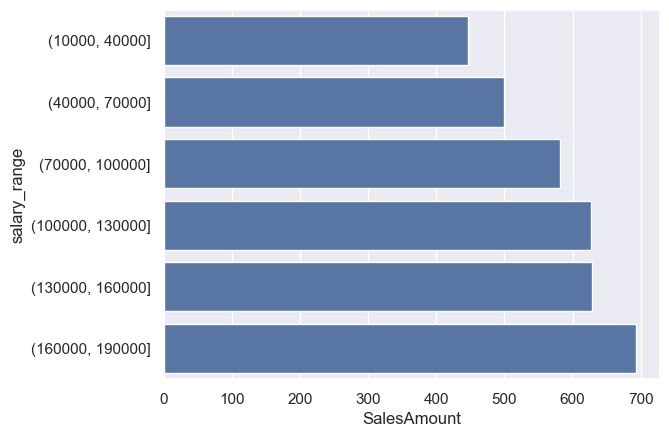

In [61]:
df_4 = df.groupby('salary_range')['SalesAmount'].mean().to_frame()
df_4.reset_index(inplace=True)
sns.barplot(x="SalesAmount", y="salary_range", data=df_4);

In [62]:
#Paritial high school vs bachlors income mean and most ordered product
df_6 = df[(df['Education']=='Partial High School')|(df['Education']=='Bachelors')].groupby('Education')['YearlyIncome'].mean().to_frame()

In [63]:
df_6.reset_index(inplace=True)
fig = px.bar(df_6, x='Education', y='YearlyIncome')
fig.update_layout(
    autosize=False,
    width=300,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ))
fig.show()

In [64]:
df_7 = df[(df['Education']=='Partial High School')|(df['Education']=='Bachelors')]
df_7 = df_7.groupby(['Education','ProductName'])['OrderQuantity'].mean().to_frame().sort_values('OrderQuantity', ascending=False)[:10]
df_7.reset_index(inplace=True)
fig = px.bar(df_7, x="Education",
             y="OrderQuantity", color="ProductName",
             title="Paritial high school vs bachlors expense analysis",
             barmode="group")
fig.show()

### CUSTOMER SEGMENTATION

In [65]:
# RFM stands for recency, frequency, monetary value.
#  In business analytics, we often use this concept to divide
#  customers into different segments, like high-value customers,
#  medium value customers or low-value customers, and similarly many others.
# Recency: How recently has the customer made a transaction with us
# Frequency: How frequent is the customer in ordering/buying some product from us
# Monetary: How much does the customer spend on purchasing products from us

In [66]:
#  calculating recency for customers who had made a purchase with a company

df_recency = df.groupby(by='FullName',
                        as_index=False)['OrderDate'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)

In [67]:
#  calculating the frequency of frequent transactions of the
#  customer in ordering/buying some product from the company.


frequency_df = df.drop_duplicates().groupby(
    by=['FullName'], as_index=False)['OrderDate'].count()
frequency_df.columns = ['CustomerName', 'Frequency']
# frequency_df.head()

In [68]:
monetary_df = df.groupby(by='FullName', as_index=False)['SalesAmount'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
# monetary_df.head()

In [69]:
# merging dataset
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(
    columns='LastPurchaseDate')
# rfm_df.head()

In [70]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
# rfm_df.head()

In [71]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
# rfm_df[['CustomerName', 'RFM_Score']].head(7)

In [72]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
# rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head(20)

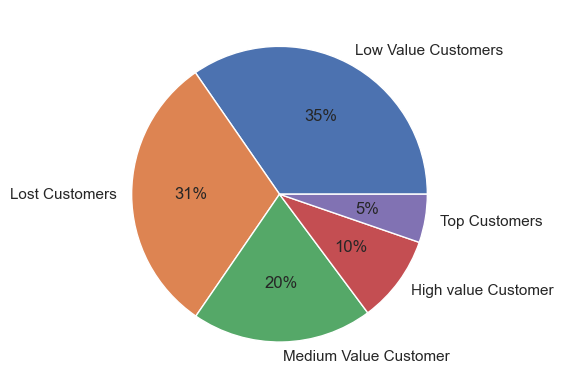

In [73]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [74]:
# create an invoice month

# Function for month
def get_month(x):
  return dt.datetime(x.year, x.month,1)

# apply the function
df['InvoiceMonth'] = df['OrderDate'].apply(get_month)
# create a column index with the minimum invoice date aka first time customer was aquired
df['CohortMonth'] = df.groupby('CustomerKey')['InvoiceMonth'].transform('min')

In [75]:

# create a date element function to get a series for subtranction
def get_date_elements(data,column):
  day = data[column].dt.day
  month = data[column].dt.month
  year = data[column].dt.year
  return day, month, year

In [76]:

# get date elements for our cohort and invoice columns(one dimentional Series)
_, Invoice_month, Invoice_year = get_date_elements(df, 'InvoiceMonth')
_, Cohort_month, Cohort_year = get_date_elements(df, 'CohortMonth')

# create a cohort index
year_diff = Invoice_year - Cohort_year
month_diff = Invoice_month - Cohort_month
df['CohortIndex'] = year_diff*12+month_diff+1

# count the customer ID by grouping by Cohort Month and Cohort index
cohort_data = df.groupby(['CohortMonth','CohortIndex'])['CustomerKey'].apply(pd.Series.nunique).reset_index()

# create pivot table
cohort_table = cohort_data.pivot(index='CohortMonth', columns=['CohortIndex'],values='CustomerKey')

# change index
cohort_table.index = cohort_table.index.strftime('%B %Y')

# cohort table for percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)

<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

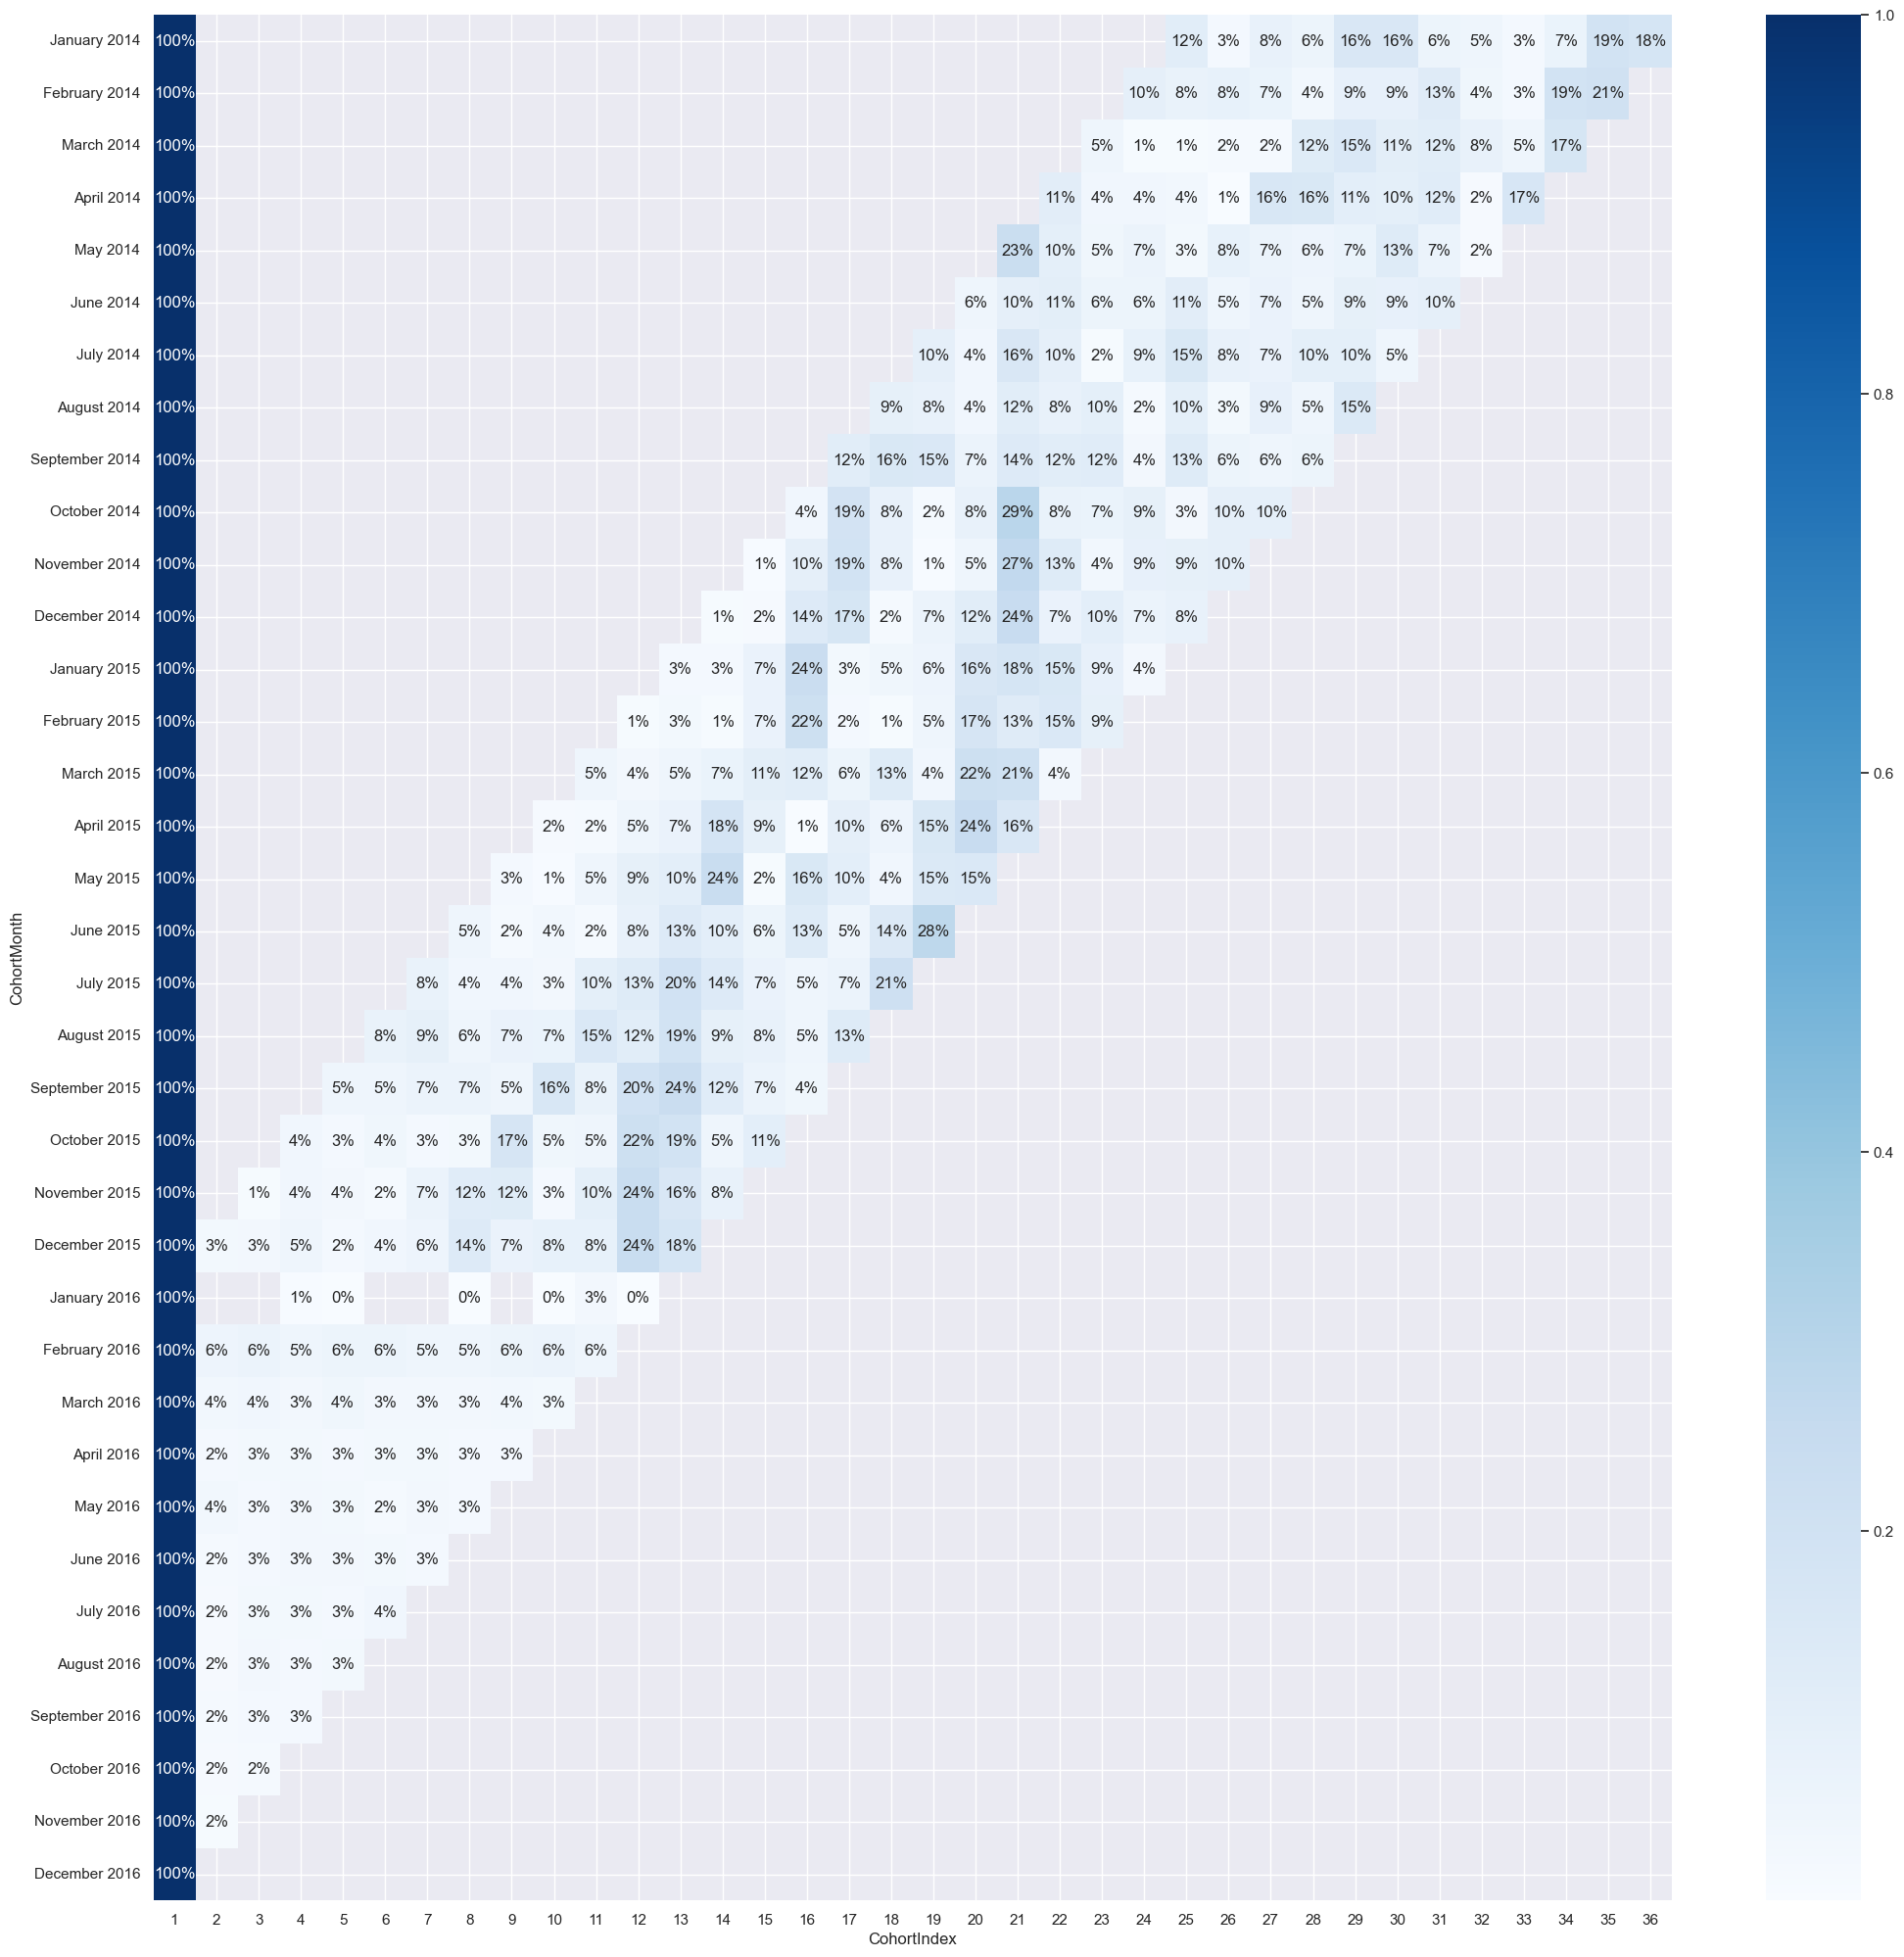

In [77]:
# create percentages
plt.figure(figsize=(25,25))
sns.heatmap(new_cohort_table, annot=True, cmap='Blues',fmt='.0%')

We can infer from the heatmap above that client retention in 2014 was subpar
Since August of 2015, we have noticed some customers returning, though not in large numbers
2016 brought about a slight improvement in retention